# **Problem Statement - Suicide Rate Analysis**

### Context

Close to 800 000 people die due to suicide every year, which is one person every 40 seconds.
Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based
interventions can be implemented at population, sub-population, and individual levels to prevent
suicide and suicide attempts. There are indications that for each adult who died by suicide there may
have been more than 20 others attempting suicide.

### Objective

The objective of this case study is to find the patterns for increased suicide rates among different
cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

### Data Dictionary

We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following
attributes:

- country: Country
- year: Year
- sex: Sex (male or female)
- age: Suicide age range, ages divided into six categories
- suicides_no: number of suicides
- population: population of that sex, in that age range, in that country, and in that year
- suicides/100k pop: Number of suicides per 100k population
- gdp_for_year($): GDP of the country in that year in dollars
- gdp_per_capita($): Ratio of the country’s GDP and its population
- generation: Generation of the suicides in question, being possible 6 different categories

In [2]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
# import dataset
df = pd.read_csv("Suicide Data.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Data Exploration
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.shape

(27820, 12)

- `Removing Null Values`

In [6]:
# find null values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# find null values percentange
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

HDI for year          69.935298
country                0.000000
sex                    0.000000
year                   0.000000
age                    0.000000
suicides_no            0.000000
suicides/100k pop      0.000000
population             0.000000
country-year           0.000000
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [8]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['country-year', 'HDI for year'])

# Handle missing values
# Since 'HDI for year' column is dropped, we don't need to handle its missing values
# For other columns, we can drop rows with missing values if any
df_cleaned = df_cleaned.dropna()

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


- `Rename the column names`

In [10]:
# Strip leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Rename the columns
df_cleaned.rename(columns={
    'suicides_no': 'Suicides Number',
    'gdp_for_year ($)': 'GDP for Year in Dollars',
    'gdp_per_capita ($)': 'GDP Per Capita in Dollars',
}, inplace=True)

# Convert all column names to uppercase
df_cleaned.columns = df_cleaned.columns.str.capitalize()

# Display the first few rows
df_cleaned.head()

,Country,Year,Sex,Age,Suicides number,Population,Suicides/100k pop,Gdp for year in dollars,Gdp per capita in dollars,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


- `Cleaning the Data`

In [11]:
# Remove 'years' from the 'Age' column
df_cleaned['Age'] = df_cleaned['Age'].str.replace(' years', '')
df_cleaned.head()

,Country,Year,Sex,Age,Suicides number,Population,Suicides/100k pop,Gdp for year in dollars,Gdp per capita in dollars,Generation
0,Albania,1987,male,15-24,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,"2,156,624,900",796,Boomers


In [12]:
# remove commas from 'GDP for Year in Dollars' column
df_cleaned['Gdp for year in dollars'] = df_cleaned['Gdp for year in dollars'].str.replace(',', '')
df_cleaned.head()

,Country,Year,Sex,Age,Suicides number,Population,Suicides/100k pop,Gdp for year in dollars,Gdp per capita in dollars,Generation
0,Albania,1987,male,15-24,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2156624900,796,Boomers


In [13]:
# print unique values of generation column
unique_generations = df_cleaned['Generation'].unique()

print("Unique Generations:", unique_generations)

Unique Generations: ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


<Axes: title={'center': 'Average Suicide Rate by Age Category'}, xlabel='Age', ylabel='Suicides/100k pop'>

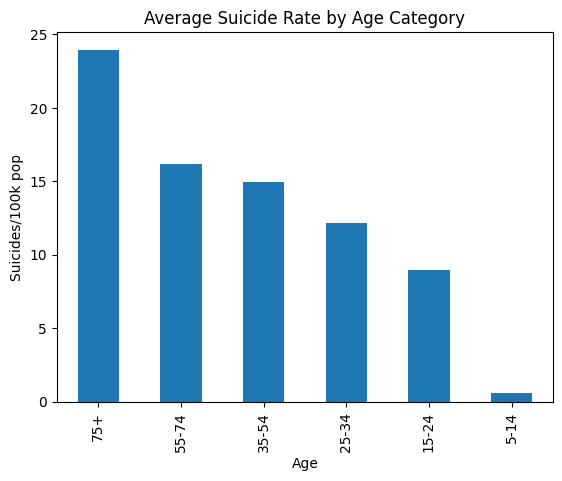

In [14]:
# Group by 'Age' and calculate the mean suicide rate
age_grouped = df_cleaned.groupby('Age')['Suicides/100k pop'].mean().sort_values(ascending=False)

# Plot the results
age_grouped.plot(kind='bar', title='Average Suicide Rate by Age Category', ylabel='Suicides/100k pop')

In [15]:
# Group by 'Country' and calculate the total number of suicides
country_grouped = df_cleaned.groupby('Country')['Suicides number'].sum().sort_values(ascending=False)

# Display the countries with the most and least number of suicides
most_suicides = country_grouped.head(1)
least_suicides = country_grouped.tail(1)

print("Country with the most suicides:\n", most_suicides)
print("\nCountry with the least suicides:\n", least_suicides)

Country with the most suicides:
 Country
Russian Federation    1209742
Name: Suicides number, dtype: int64

Country with the least suicides:
 Country
Saint Kitts and Nevis    0
Name: Suicides number, dtype: int64


In [16]:
# Applying a logarithmic transformation of population
df_cleaned['Log_Population'] = np.log(df_cleaned['Population'])
df_cleaned['Log_Suicides/100K'] = np.log(df_cleaned['Suicides/100k pop'])

c:\Users\Admin\miniconda3\envs\python_ml\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Effect of Population on Suicide Rates'}, xlabel='Log_Population', ylabel='Suicides/100k pop'>

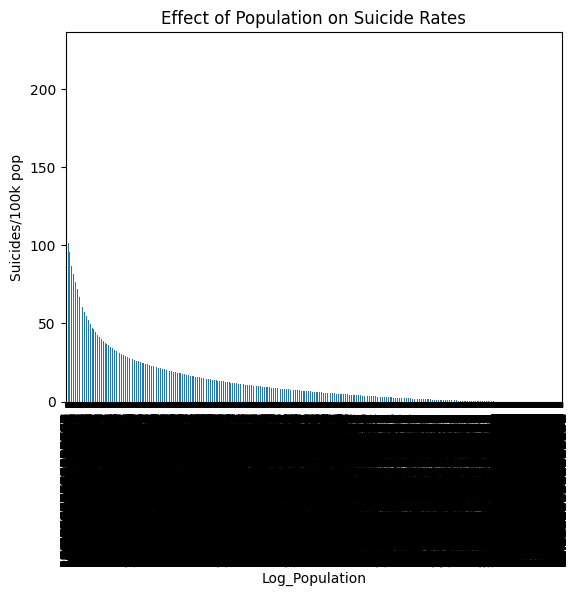

In [17]:
# Group by 'Population' and 'Suicide Rate'
pop_grouped = df_cleaned.groupby('Log_Population')['Suicides/100k pop'].mean().sort_values(ascending=False)

# Plot the results
pop_grouped.plot(kind='bar', title='Effect of Population on Suicide Rates', ylabel='Suicides/100k pop')

<Axes: title={'center': 'Effect of GDP Per Capita on Suicide Rates'}, xlabel='GDP Per Capita in Dollars', ylabel='Suicides/100k pop'>

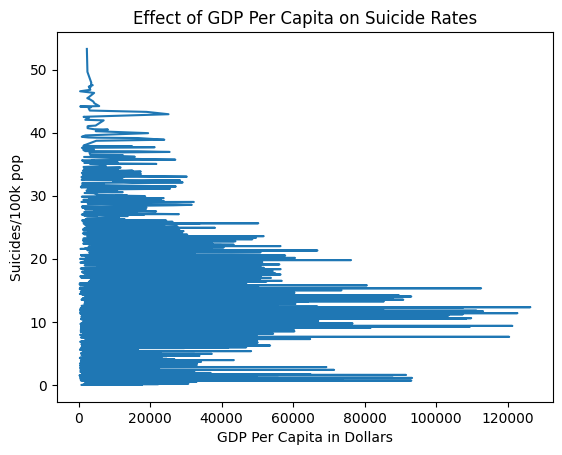

In [18]:
# Convert 'Gdp for year in dollars' to numeric
df_cleaned['Gdp for year in dollars'] = pd.to_numeric(df_cleaned['Gdp for year in dollars'])

# Group by 'GDP Per Capita in Dollars' and calculate the mean suicide rate
gdp_grouped = df_cleaned.groupby('Gdp per capita in dollars')['Suicides/100k pop'].mean().sort_values(ascending=False)

# Plot the results
gdp_grouped.plot(kind='line', title='Effect of GDP Per Capita on Suicide Rates', ylabel='Suicides/100k pop', xlabel='GDP Per Capita in Dollars')

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    27820 non-null  object 
 1   Year                       27820 non-null  int64  
 2   Sex                        27820 non-null  object 
 3   Age                        27820 non-null  object 
 4   Suicides number            27820 non-null  int64  
 5   Population                 27820 non-null  int64  
 6   Suicides/100k pop          27820 non-null  float64
 7   Gdp for year in dollars    27820 non-null  int64  
 8   Gdp per capita in dollars  27820 non-null  int64  
 9   Generation                 27820 non-null  object 
 10  Log_Population             27820 non-null  float64
 11  Log_Suicides/100K          27820 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 2.5+ MB


<Axes: title={'center': 'Trend of Suicide Rates'}, xlabel='Year', ylabel='Suicides/100k pop'>

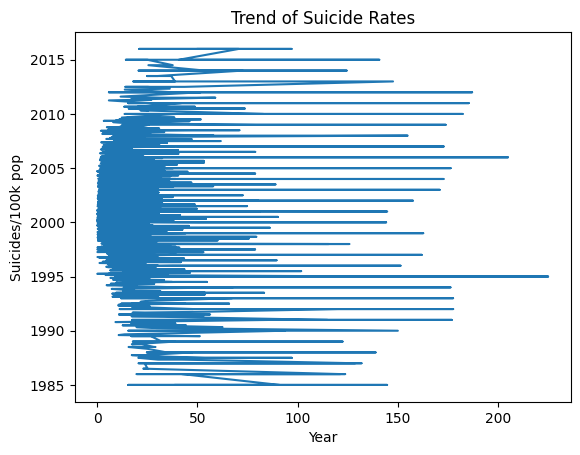

In [28]:
# Group by "Suicide rates" with "Year"
trend_grouped = df_cleaned.groupby('Suicides/100k pop')['Year'].mean().sort_values(ascending=False)

# Plot the results
trend_grouped.plot(kind='line', title='Trend of Suicide Rates', ylabel='Suicides/100k pop', xlabel='Year')

<Axes: title={'center': 'Average Suicide Rate by Sex'}, xlabel='Sex', ylabel='Suicides/100k pop'>

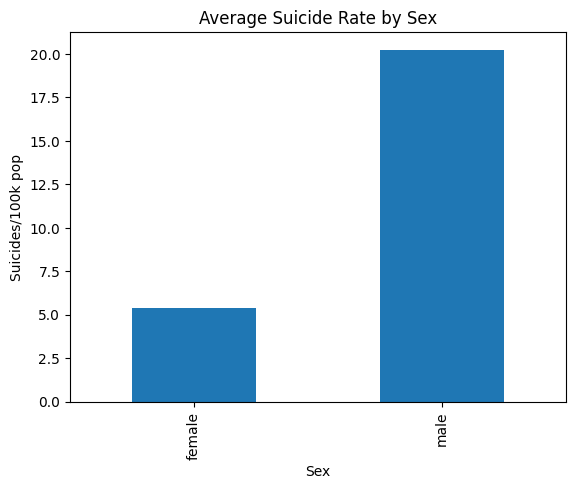

In [26]:
# Group by 'Sex' and calculate the mean suicide rate
sex_grouped = df_cleaned.groupby('Sex')['Suicides/100k pop'].mean()

# Plot the results
sex_grouped.plot(kind='bar', title='Average Suicide Rate by Sex', ylabel='Suicides/100k pop')

## Questions to explore

- **Is the suicide rate more prominent in some age categories than others?**
  - The suicide rate is highest among individuals aged 75 and above, gradually decreasing across the age groups as follows: 55–74, 35–44, 25–34, 15–24, and lowest in the 5–14 age group.
- **Which countries have the most and the least number of suicides?**
  - The country with the highest number of suicides is the Russian Federation, with a total of 1,209,742 suicides.
  - On the other hand, the country with the lowest number of suicides is Saint Kitts and Nevis, which reported 0 suicides.
- **What is the effect of the population on suicide rates?**
  - Smaller populations may have higher rates due to isolation, lack of mental health resources, or social stigmas
  - Larger populations might benefit from better infrastructure, awareness campaigns, and community support, reducing suicide rates.
- **What is the effect of the GDP of a country on suicide rates?**
  - Higher Suicide rates at low GDP per Capita.
  - Moderate Suicide rates at Middle-Income Countries.
  - Lower Suicide rates in the wealthiest countries.
- **What is the trend of suicide rates across all the years?**
  - Suicide rates fluctuated over the years, peaking around 1995–2005, with increased variability in recent years possibly due to improved reporting and societal factors.
- **Is there a difference between the suicide rates of men and women?**
  - The suicide rate among males is significantly higher than that of females.